<a href="https://colab.research.google.com/github/daJarae/DL_Scratch/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%94%A5%EB%9F%AC%EB%8B%9D_4%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#정리

머신러닝: 사람이 문제 해결에 필요한 feature 등 설정함

딥러닝: 입력에서 출력까지 사람의 개입이 없음 (개입 없이 결과 얻음) <- end-to-end ML

범용 능력: 아직 보지 못한 데이터로 이루어진 문제도 해결할 수 있는 능력 (ML의 최종목표)

오버피팅: 학습시킨 모델이 특정 데이터셋에만 지나치게 최적화된 상태

손실함수: 학습 중 최적의 매개변수 값을 탐색하는 지표로, MSE(회귀)와 cross-entropy(분류)를 주로 사용



---



In [ ]:
def imti(name):
  from matplotlib.image import imread
  img=imread(name+'.png')
  plt.imshow(img)
  plt.xticks([]); plt.yticks([])
  plt.show()

#손실함수

#오차제곱합

In [ ]:
def mse(y,t):                   #y는 정답 배열, t는 예측 배열
  return 0.5**np.sum((y-2)**2)  #0.5 곱은 영향은 크게 없고 미분 모양이 정갈해서로 앎

In [ ]:
y=np.array([0.2,0.3,0.5])
t=np.array([0,0,1])

mse(y,t)

0.0030017093384531513

#교차 엔트로피

In [ ]:
def cen(y,t):
  c=1e-7      #np.log() 내부가 0이 되는 것 방지
  return -np.sum(t*np.log(y+c))

In [ ]:
y=np.array([0.2,0.3,0.5]) #array여야 c와 더해짐
t=np.array([0,0,1])

cen(y,t)

0.6931469805599654

In [ ]:
#t가 1인 인덱스만 계산되므로 아래와 같음
-np.log(0.5+1e-7)

0.6931469805599654

log(x): 인풋(신경망 출력값)이 1에 가까울수록 0에 가까운 음수를 반환

이때 손실함수는 "작을수록 좋은" 것이므로

x가 1에 가까울수록 작은 값을 내도록 -log(x)로 바꿔 사용

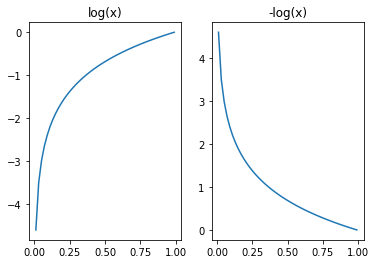

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()

plt.subplot(1,2,1)
x=np.arange(0.01, 1.01, 0.02)
plt.plot(x, np.log(x))
plt.title('log(x)')

plt.subplot(1,2,2)
x=np.arange(0.01, 1.01, 0.02)
plt.plot(x, -np.log(x))
plt.title('-log(x)')

plt.show()

-log 함수 모양 상 0~0.2 사이에서 x값의 작은 변화에도 y값이 크게 바뀌고,

x= 0.2 정도의 특정값 이상부터 x가 크게 변화해도 천천히 상승함

이 상승 추세가 0 근처 x값은 빠르게 변화하도록 (큰 미분값),

 1에 가까운 안정적인 출력값을 내는 x값은 천천히 변화하도록 (작은 미분값) 도와줄 것 같다

#미니배치 학습을 위한 교차 엔트로피

데이터 하나 에 대한 크로스 엔트로피: E= -sum_k(t_k * log(y_k))

데이터 여럿에 대한 크로스 엔트로피:  E= -sum_i(sum_k(t_i_k * log(y_i_k))) /n

각 i번째 데이터의 t_k, y_k에 대해 위 계산 적용 후 평균값 구함!

#미니배치

에포크마다 모든 데이터에 대해 loss를 계산하는 것은 비효율적으로 시간을 소모하기 때문에, 

일부 훈련데이터를 뽑아 실질 loss의 근사치를 찾기 위함

In [ ]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_x.shape[0]

60000

In [ ]:
#넘파이에도 랜덤 선택이 있다!
mini_mask=np.random.choice(train_x.shape[0], 3)

In [ ]:
print(mini_mask)
print(train_y[mini_mask])

[ 1424 58104 54367]
[6 2 8]


미니배치용 교차 엔트로피

In [ ]:
def cen(y,t):
  #데이터 한 개 입력받을 경우
  if y.ndim==1:
    t=t.reshape(1, t.size); y=y.reshape(1,y.size)

  batch_size=y.shape[0] #미니배치: 미니배치 묶음을 x,y에 할당
  return -np.sum(t*np.log(y+1e-7))/batch_size

#t가 [0,0,1] 등이 아닌 정수일 경우

def cen2(y,t):
  if y.ndim==1:
    t=t.reshape(1, t.size); y=y.reshape(1,y.size)

  batch_size=y.shape[0] #미니배치: 미니배치 묶음을 x,y에 할당
  return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size


막줄 코드는 이런 의미

In [ ]:
y=np.array([[0.1,0.4,0,0.5],
            [0.1,0.2,0,0.7],
            [0.4,0.3,0.3,0]])

y[[0,1,2],[0,1,2]] #(0,0), (1,1), (2,2) 위치의 값 반환

array([0.1, 0.2, 0.3])

아래처럼 정답 레이블 배열 t를 열의 인덱스로 사용

In [ ]:
y=np.array([[0.1,0.4,0,0.5],
            [0.1,0.2,0,0.7],
            [0.4,0.3,0.3,0]])

print([np.arange(3),[3,3,0]])
print(y[np.arange(3),[3,3,0]])

[array([0, 1, 2]), [3, 3, 0]]
[0.5 0.7 0.4]




---



#정확도 대신 손실함수?

정확도라는 지표를 놔두고 손실함수의 값이라는 우회적인 방법을 택하는 이유는

손실함수를 최소화하는 매개변수를 찾는 과정에서 매개변수의 손실함수 미분을 계산하고 매개변수를 갱신하기 때문

(근데 정확도도 미분값 업데이트는 가능하지 않나요? 대답이 안되는데)

정확도의 경우 **미분 값이 대부분의 장소에서 0이 되기 때문에 매개변수 갱신이 어렵다**는데


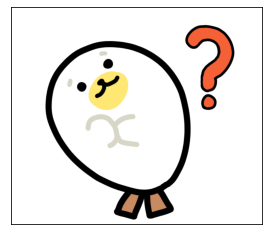

그 정확도 식은 뭐죠...? 당연히 손실함수의 음수 버전이 정확도를 의미하는 줄 알았는데


In [ ]:
imti('why')
print('그 정확도 식은 뭐죠...? 당연히 손실함수의 음수 버전이 정확도를 의미하는 줄 알았는데')



---




-> 아 추상적으로 '정확성을 나타내는 지표'로서의 정확도가 아니라 **(맞춘 개수/전체 문제수)**를 의미해서 불연속적이고,

이는 **매개변수를 조금씩 바꿔가며 성능이 개선되는지 볼 수 없음**을 의미함 

모든 점에서 기울기가 0이 되지 않는 시그모이드 함수가 유용

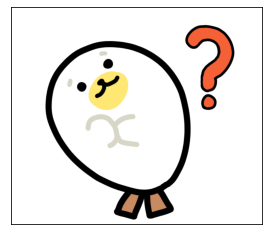

근데 그러면 0이 되어서 문제이기 이전에 불연속적이어서 미분값이 없는 문제 아닌가요?


In [ ]:
imti('why')
print("근데 그러면 0이 되어서 문제이기 이전에 불연속적이어서 미분값이 없는 문제 아닌가요?")

이산확률분포처럼 연속이라 가정하고 미분하고 y값 대입하는 식으로 미분 구하는 건가...

#수치 미분: 미분의 근사

수치미분: 아주 작은 차분 f(x+h) - f(x) 을 이용해 순간 변화량의 근사값을 구함

해석적 미분: 수식 전개 & h->0 극한으로 오차 포함하지 않는 미분값을 구함



해석적 미분이 안되는 함수식도 많기 때문에 수치 미분 이용, 이때 주의점

1) h가 0에 근사할수록 미분값 식의 정확성은 높으나 1e-50처럼 작은 h를 쓸 경우 소수점 8자리 이하를 계산에서 생략하는 반올림 오차(rounding error) 문제를 일으킴
(np.float32(1e-50)의 결과는 0)

2) 조건 1 고려해 차분 계산시 기존의 전방 차분 식을 그대로 사용하는 것보다 중앙차분 f(x+h) - f(x-h) / 2h 를 이용하는 것이 나음 (같거나 낫다)

#편미분: 다변수 함수의 미분

기울기(그라디언트): (df/dx1, df/dx2) 처럼 모든 변수의 편미분을 벡터로 정리한 것

In [125]:
import numpy as np

def gradient(f,x):
  grad=np.zeros_like(x)

  for i in range(x.size): #x배열 원소마다
    temp=x[i]
    x_=[n for n in x]

    x_[i]=temp+0.001; f1=f(x_) #내부에서 x를 바꿀수가 있어??
    x_[i]=temp-0.001; f2=f(x_)
    grad[i]=round(((f1-f2)/0.02),5) 

  return grad

In [126]:
def f(x):
  return x[0]**2+x[1]**2

In [127]:
from numpy import array as arr
f(arr([0,1]))

1

In [128]:
gradient(f, arr([3,4]))

array([6, 8])

분명 x[i]+0.0001을 대입하는데 왜 x[i]+1이 되는지 모르겠다.

반올림 설정이 잘못 되어있는건지..ㅠ

-> 일단은 코드 뜯어보고 수정함

문제는

1. temp=x 처럼 리스트 할당 시 주소 같아서 temp를 수정해도 x 같이 수정됨 (temp 사용 의미 x) 

      교재처럼 temp=x[i] 쓰고 temp 수정 후 x[i]=temp로 재할당은 가능


2. grad[i]=(f1-f2)/0.02) 계산 할당시 5.99999... 나오면 소숫점 다 버리고 5로 내려버리는 문제

      round 함수 쓰면 됨

#그라디언트의 중요성: 

기울기가 가리키는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향임 (음수인 경우 지나온 방향을 가리키는 것으로 해석)

#경사하강법

기계학습이 학습단계에서 최적 매개변수를 찾아내듯 신경망도 학습 시 가중치, 편향 최적 찾아야함 (손실함수 최소)

신경망 학습에 많이 사용


- 광대한 매개변수 가능 범위에서 기울기를 활용해 최솟값을 찾음
- 그러나 경사하강법이 **최솟값 도달을 보장하지 않음**
- 경사하강법은 **기울기가 0**인 장소를 찾으므로 global min, local min, saddle point 중 하나를 찾게됨
- **복잡하고 찌그러진 함수는 plateau**(고원. 학습 정체를 일으키는 편평한 지대)에 빠질수도

경사법 수식: x0=x0-n*(df/dx0)

학습률 n은 신경망 학습 중 변경하면서 올바르게 학습되는지 확인 필요

부호가 반대면 경사상승법이라 부름 (기타 동일)

In [129]:
def gradient_desc(f, init_x, steps,lr=0.01):
  x=init_x

  for _ in range(steps):

    grad=arr(gradient(f,x)).astype(np.float)
    x=x-lr*grad #int array면 -= 연산이 안됨 (x=x-~는 가능)

  return x

In [131]:
gradient_desc(f, init_x=arr([0,1]),steps=100,lr=0.1)

array([0.e+00, 2.e-06])

In [134]:
gradient_desc(f, init_x=arr([0,1]),steps=100,lr=5)

#학습률이 너무 크면 발산

array([ 0.00000000e+00, -2.35278097e+14])

In [135]:
gradient_desc(f, init_x=arr([0,1]),steps=100,lr=1e-10)

#학습률이 너무 작으면 갱신 거의 x 

array([0.        , 0.99999998])

#하이퍼파라미터

학습률 같은 매개변수. 학습 알고리즘에 의해 획득되는 신경망의 매개변수 (가중치, 편향)과 달리 사람이 직접 설정해야함.

 (여러 후보를 시험해보고 가장 잘 학습하는 값 찾음)

In [137]:
from my import softmax #오오오 된다..!!

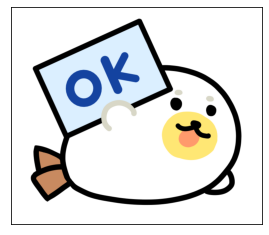

In [180]:
from md import imti
imti('export(19)')

In [142]:
softmax(arr([1,2]))

array([0.26894142, 0.73105858])

#간단 신경망

In [160]:
from md import softmax, cen

In [161]:
np.random.randn(2,3) #정규분포 원소로 2x3 크기 행렬 뽑아옴

array([[ 1.04527599, -1.65494428,  1.30737714],
       [ 1.852693  ,  0.15751533, -0.22133321]])

In [162]:
class Net:
  def __init__(self):
    self.w=np.random.randn(2,3) #모델 생성시, 가중치 초기화

  def predict(self, x):
    return np.dot(x, self.w) #편향은 없다는 설정인듯

  def loss(self, x, t):
    return cen(softmax(self.predict(x)),t) #손실 계산할 때도 softmax 거친다!

In [170]:
net=Net()
print(net.w)

[[-1.17352868  0.53543484  0.02759282]
 [-1.12735131  1.49118269 -0.11663377]]


In [164]:
x=arr([0.6,0.9])
p=net.predict(x)
print(p)
print(np.argmax(p)) #소맥 없이 사용 가능

[0.3817427  1.04537259 0.16490993]
1


In [165]:
temp_ans=softmax(net.predict(x))
print(temp_ans) #최종 레이블과 함께 다른 레이블 확률도 볼 때 사용
print(np.argmax(temp_ans)+1) #레이블이 1번부터라면 +1

[0.26688781 0.51825027 0.21486192]
2


In [166]:
t=np.array([0,0,1]) #정답이 3번이었다면
net.loss(x, t)

1.5378

In [177]:
from md import gradient
f= lambda w: net.loss(x,t) #w는 임의 변수
dw=gradient(f, net.w) #net.loss 방식으로 net.w의 gradient 계산

In [178]:
dw #rounding error가 또 발생한듯 하다.. 하지만 md 파일에서는 문제 없었는데...

#위 계산 과정에서 소수점이 많이 낮아지는 걸수도.

array([[0., 0., 0.],
       [0., 0., 0.]])

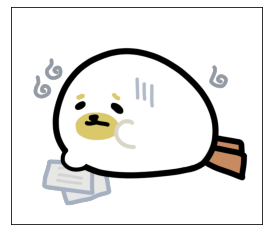

In [181]:
imti('disappointed')

#학습알고리즘

전제: 신경망의 가중치. 편향을 훈련 데이터에 적응하도록 '학습'시킴

미니배치: 훈련 데이터 일부를 무작위로 선별한 데이터 묶음



경사법: 각 에포크 내 스텝에서 미니배치를 바탕으로

 가중치에 대한 손실함수 미분값을 구하고
 
 이 손실함수 최소화 방향 정보(그라디언트)를 사용해 매개변수를 조금씩 갱신


그럼 미니배치에 대한 손실 계산은 실질적으로 사람 확인용 (history 출력)이지 계산에 이용되진 않는군요...

#확률적 경사 하강법 SGD

매개변수 갱신용 데이터를 미니배치로 무작위 선정하기 때문에 확률적 경사 하강법이라 부름 (!!)

4.5.1부터의 내용은 MNIST 데이터를 이용한 실습이므로 새로운 노트를 열겠습니다~

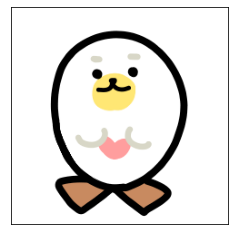

In [182]:
imti('miniheart')